In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pygam import LinearGAM, s
import statsmodels.api as sm

In [3]:
# Load Excel
df = pd.read_excel('Training.xlsx') 

In [4]:
filtered_df = df[
    (df['Hotel_id'] == 320) &
    (df['Arrival_Date'] >= '2023-03-01') &
    (df['Arrival_Date'] <= '2023-05-31') &
    (df['Is_Week_End(arr)'] == False)
].drop_duplicates(subset=['Reservation_Date'], keep='first')

In [4]:
X = filtered_df[['Paid_Price']]
y = filtered_df['Occ_Rate_Arr']

linear_model = LinearRegression()
linear_model.fit(X, y)

print("Linear model: D(p) = a - b*p")
print("Intercept (a):", linear_model.intercept_)
print("Slope (-b):", linear_model.coef_[0])
print("R²:", linear_model.score(X, y))

Linear model: D(p) = a - b*p
Intercept (a): 1.1984475066657438
Slope (-b): -0.000455183153663362
R²: 0.20755449857211328


In [6]:
y_pred = linear_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
print("RMSE:", round(rmse, 4))

RMSE: 0.0828


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [8]:
mae = mean_absolute_error(y, y_pred)
print("MAE:", round(mae, 4))

MAE: 0.0617


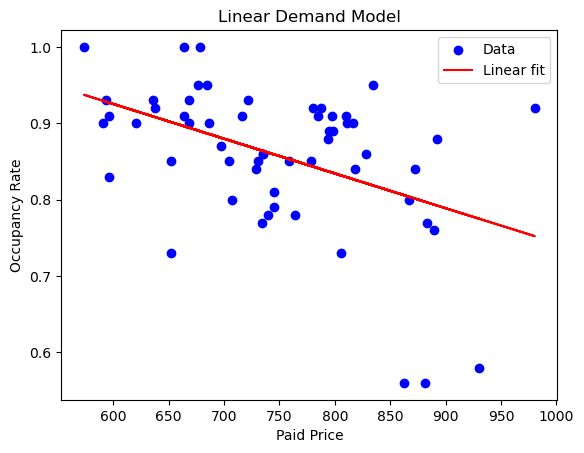

In [9]:
# Linear plot
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, linear_model.predict(X), color='red', label='Linear fit')
plt.xlabel("Paid Price")
plt.ylabel("Occupancy Rate")
plt.title("Linear Demand Model")
plt.legend()
plt.show()

In [10]:
X_log = np.log(filtered_df[['Paid_Price']])
y_log = np.log(filtered_df['Occ_Rate_Arr'])

log_model = LinearRegression()
log_model.fit(X_log, y_log)

print("\nLog-log model: log(D) = a - ε * log(p)")
print("Intercept (a):", log_model.intercept_)
print("Elasticity (ε):", log_model.coef_[0])  # Note: ε is negative
print("R²:", log_model.score(X_log, y_log))


Log-log model: log(D) = a - ε * log(p)
Intercept (a): 2.687090606093644
Elasticity (ε): -0.4307454427016453
R²: 0.19852126873398424


In [11]:
# Predict log(y), then convert to actual scale
y_log_pred = log_model.predict(X_log)
y_pred_actual = np.exp(y_log_pred)
y_actual = filtered_df['Occ_Rate_Arr'].values

rmse = mean_squared_error(y_actual, y_pred_actual, squared=False)
print("RMSE (actual scale):", round(rmse, 4))

RMSE (actual scale): 0.0834


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
mae = mean_absolute_error(y_actual, y_pred_actual)
print("MAE (actual scale):", round(mae, 4))

MAE (actual scale): 0.0633


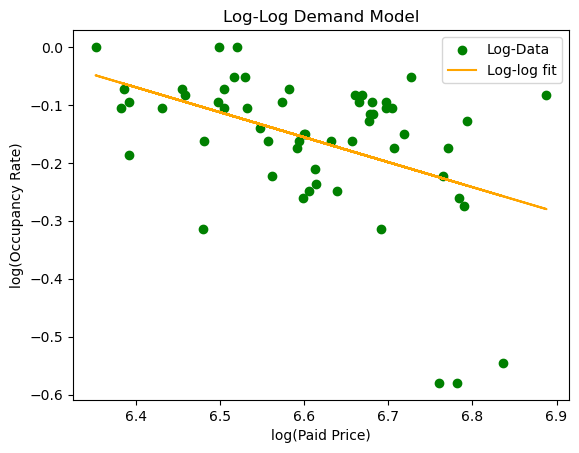

In [13]:
# Log-log plot
plt.scatter(X_log, y_log, color='green', label='Log-Data')
plt.plot(X_log, log_model.predict(X_log), color='orange', label='Log-log fit')
plt.xlabel("log(Paid Price)")
plt.ylabel("log(Occupancy Rate)")
plt.title("Log-Log Demand Model")
plt.legend()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

df = filtered_df.copy()

# Log-transform
filtered_df['log_price'] = np.log(filtered_df['Paid_Price'])
filtered_df['log_demand'] = np.log(filtered_df['Occ_Rate_Arr'])

# Add features
filtered_df['log_lead'] = np.log(filtered_df['Booking_Lead'] + 1)  # Avoid log(0)
filtered_df = pd.get_dummies(filtered_df, columns=['Arr_Season'], drop_first=True)

# Select variables
X = filtered_df[['log_price', 'log_lead'] + [col for col in df.columns if col.startswith('Arr_Season_')]]
X = sm.add_constant(X)
y = filtered_df['log_demand']

# Fit model
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             log_demand   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     7.966
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           0.000930
Time:                        13:47:09   Log-Likelihood:                 46.960
No. Observations:                  57   AIC:                            -87.92
Df Residuals:                      54   BIC:                            -81.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4930      0.776      3.212      0.0

In [16]:
X = filtered_df[['Paid_Price']]
y = filtered_df['Occ_Rate_Arr']

In [17]:
from pygam import LinearGAM, s
gam = LinearGAM(s(0)).fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      8.7474
Link Function:                     IdentityLink Log Likelihood:                                 -4215.5915
Number of Samples:                           57 AIC:                                             8450.6778
                                                AICc:                                            8455.2077
                                                GCV:                                                0.0074
                                                Scale:                                              0.0054
                                                Pseudo R-Squared:                                   0.4702
Feature Function                  Lam

C:\Users\DELL\AppData\Local\Temp\ipykernel_16876\2547652167.py:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


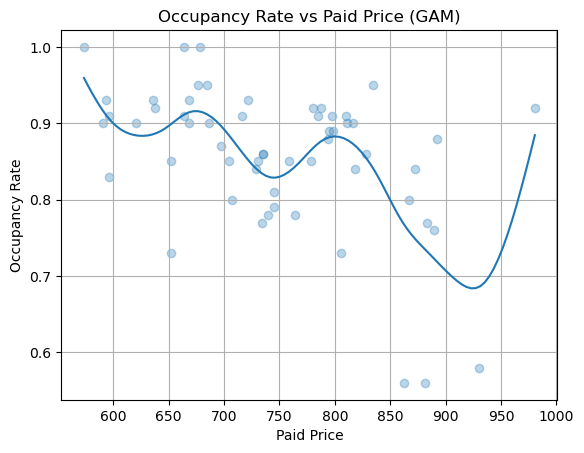

In [18]:
import matplotlib.pyplot as plt
XX = gam.generate_X_grid(term=0)
plt.plot(XX, gam.predict(XX))
plt.scatter(X, y, alpha=0.3)
plt.title("Occupancy Rate vs Paid Price (GAM)")
plt.xlabel("Paid Price")
plt.ylabel("Occupancy Rate")
plt.grid(True)
plt.show()

In [5]:
# Prepare input and output variables
X = filtered_df[['Paid_Price']]
y = filtered_df['Occ_Rate_Arr']

In [18]:
#Price demand modeling with GAMs (demand response)

In [6]:
# Reshape input
X = X.values.reshape(-1, 1)
y = y.values

In [9]:
from pygam import ExpectileGAM

ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.8998
Link Function:                     IdentityLink Log Likelihood:                                 -1059.5351
Number of Samples:                           57 AIC:                                             2132.8698
                                                AICc:                                              2135.09
                                                GCV:                                                0.0255
                                                Scale:                                              0.0208
                                                Pseudo R-Squared:                                  -1.1585
Feature Function                  Lam

C:\Users\DELL\AppData\Local\Temp\ipykernel_19112\3945118638.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19112\3945118638.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19112\3945118638.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


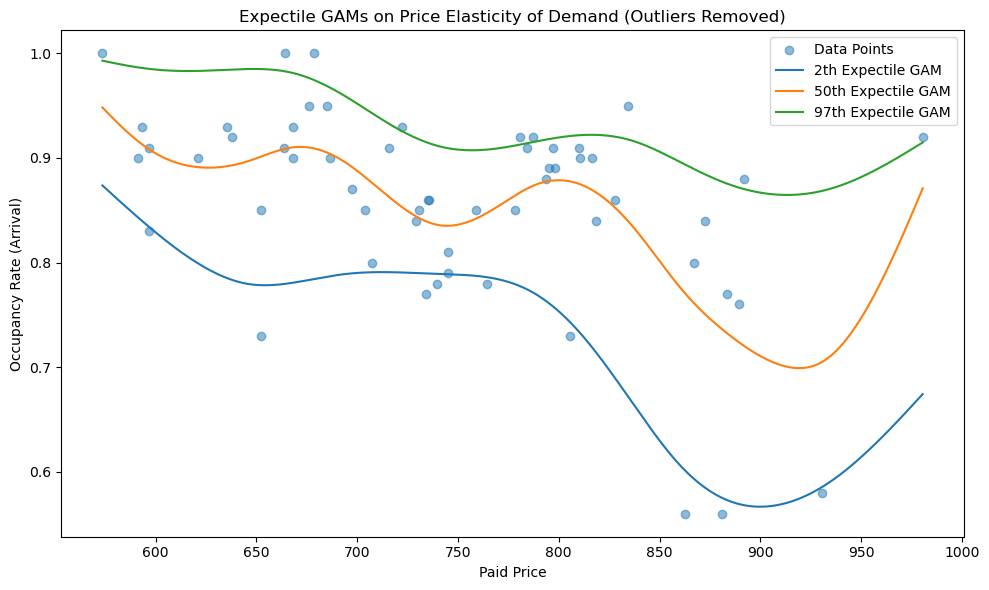

In [23]:
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X, y)
    gam_results[q] = gam
    gam.summary()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Occupancy Rate (Arrival)')
plt.title('Expectile GAMs on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# Prepare input and output variables
X1 = filtered_df[['Paid_Price_1']]
y1 = filtered_df['Occ_Rate_Arr']

In [21]:
# Reshape input
X1 = X1.values.reshape(-1, 1)
y1 = y1.values

ExpectileGAM                                                                                              
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      5.8998
Link Function:                     IdentityLink Log Likelihood:                                 -1059.5351
Number of Samples:                           57 AIC:                                             2132.8698
                                                AICc:                                              2135.09
                                                GCV:                                                0.0255
                                                Scale:                                              0.0208
                                                Pseudo R-Squared:                                  -1.1585
Feature Function                  Lam

C:\Users\DELL\AppData\Local\Temp\ipykernel_19112\753620499.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19112\753620499.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()
C:\Users\DELL\AppData\Local\Temp\ipykernel_19112\753620499.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


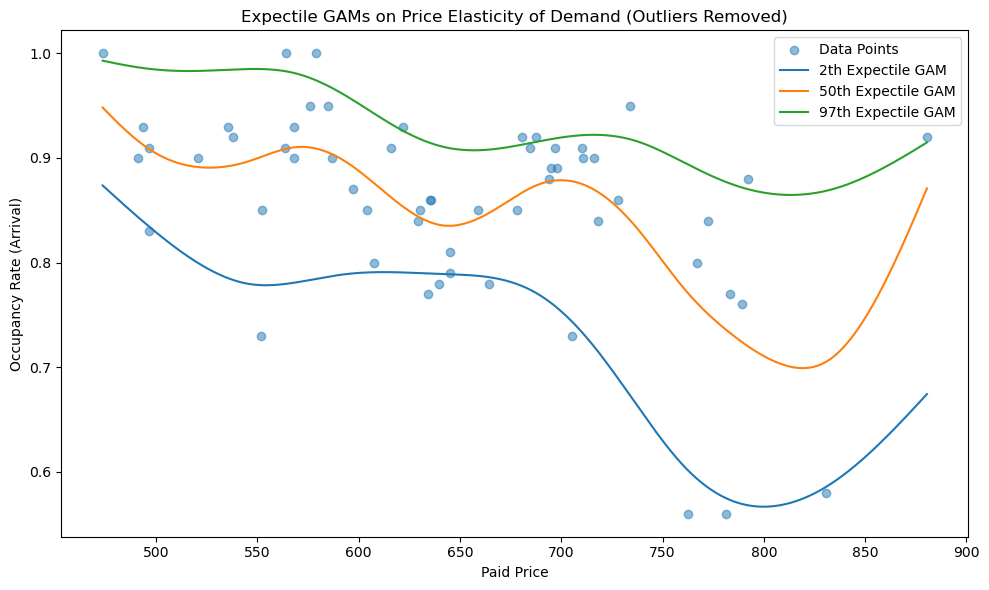

In [24]:
# Define expectiles (quantiles equivalent for ExpectileGAM)
quantiles = [0.025, 0.5, 0.975]
gam_results = {}

# Fit an ExpectileGAM for each quantile
for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q)
    gam.fit(X1, y1)
    gam_results[q] = gam
    gam.summary()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X1, y1, alpha=0.5, label='Data Points')

# Create evenly spaced X values for predictions
XX = np.linspace(X1.min(), X1.max(), 1000).reshape(-1, 1)

# Plot each fitted GAM curve
for q, gam in gam_results.items():
    plt.plot(XX, gam.predict(XX), label=f'{int(q*100)}th Expectile GAM')

# Customize plot
plt.xlabel('Paid Price')
plt.ylabel('Occupancy Rate (Arrival)')
plt.title('Expectile GAMs on Price Elasticity of Demand (Outliers Removed)')
plt.legend()
plt.tight_layout()
plt.show()